# Plots of Watershed Algorithm on Comet

In [62]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4).pprint

blues   = cm.get_cmap(plt.get_cmap('Blues'))
greens  = cm.get_cmap(plt.get_cmap('Greens'))
reds    = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys   = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

def merge_dicts(x, y):
    z = x.copy()   # start with x's keys and values
    z.update(y)    # modifies z with y's keys and values & returns None
    return z

Calculate the mean and standard deviation of Pilot execution times

In [70]:
folder      = 'data_watershed_rp'
weak_data   = 'watershed_rp_weak_20to29.csv'
strong_data = 'watershed_rp_strong_20to29.csv'

columns=['nodes', 'duration_TTC', 'duration_Units']

raw_weakdf   = pd.read_csv(os.path.join(folder, weak_data))[columns]
raw_strongdf = pd.read_csv(os.path.join(folder, strong_data))[columns]

weak_mean    = raw_weakdf.groupby('nodes').mean()
weak_error   = raw_weakdf.groupby('nodes').std()
strong_mean  = raw_strongdf.groupby('nodes').mean()
strong_error = raw_strongdf.groupby('nodes').std()

Plot mean Pilot execution times

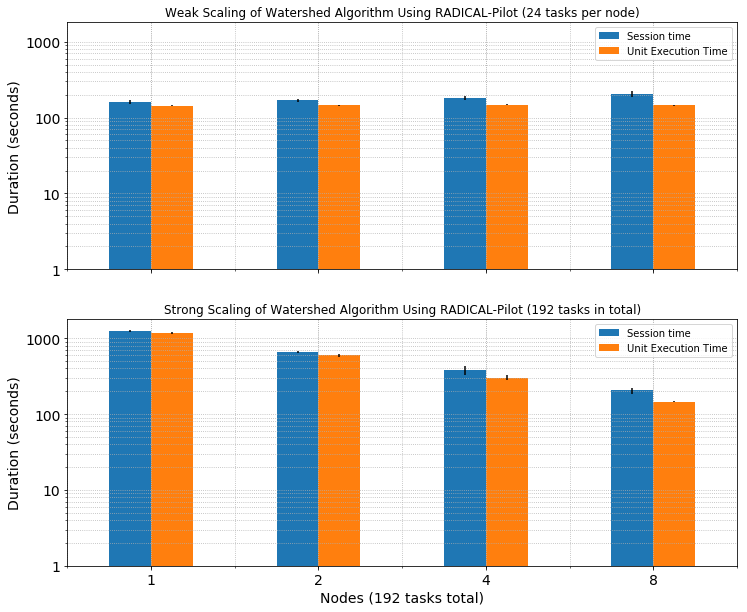

In [98]:
fig,axes = plt.subplots(nrows=2,ncols=1,sharex=True,sharey=True)
fig.set_size_inches(12,10)
width = 0.2

shared_kwargs = {'kind'     : 'bar',
#                  'legend'   : False,
                 'log'      : True,
                 'fontsize' : 14
                }

weak_title    = {'title'    : 'Weak Scaling of Watershed Algorithm Using RADICAL-Pilot (24 tasks per node)',
                 'ax'       : axes[0],
                 'yerr'     : weak_error
                  }
strong_title  = {'title'    : 'Strong Scaling of Watershed Algorithm Using RADICAL-Pilot (192 tasks in total)',
                 'ax'       : axes[1],
                 'yerr'     : strong_error
                }

weak_kwargs     = merge_dicts(shared_kwargs, weak_title)
weak_scale_plot = weak_mean.plot(**weak_kwargs)
weak_scale_plot.set_ylabel('Duration (seconds)',fontsize=14)
weak_scale_plot.set_yticks([1, 10, 100, 1000])
weak_scale_plot.set_yticklabels(['1','10','100','1000'],fontsize=14)
weak_scale_plot.grid('on',which='both',linestyle=':')
axes[0].legend(['Pilot Execution', 'Unit Execution Time'])

strong_kwargs     = merge_dicts(shared_kwargs, strong_title)
strong_scale_plot = strong_mean.plot(**strong_kwargs)
strong_scale_plot.set_ylabel('Duration (seconds)',fontsize=14)
strong_scale_plot.set_xlabel('Nodes (192 tasks total)',fontsize=14)
strong_scale_plot.set_yticks([1, 10, 100, 1000])
strong_scale_plot.set_yticklabels(['1','10','100','1000'],fontsize=14)
strong_scale_plot.set_xticklabels(['1','2','4','8'],rotation=0,fontsize=14)
strong_scale_plot.grid('on',which='both',linestyle=':')
axes[1].legend(['Session time', 'Unit Execution Time'])